In [40]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import math

TAREA: Captura una o varias imágenes con monedas no solapadas. Tras visualizar la imagen, identifica de forma interactiva (por ejemplo haciendo clic en la imagen) una moneda de un valor determinado en la imagen (por ejemplo de 1€). Tras ello, la tarea se resuelve mostrando por pantalla el número de monedas y la cantidad de dinero presentes en la imagen. No hay restricciones sobre utilizar medidas geométricas o de color. ¿Qué problemas han observado?

Nota: Para establecer la correspondencia entre píxeles y milímetros, comentar que la moneda de un euro tiene un diámetro de 23.25 mm. la de 50 céntimos de 24.35, la de 20 céntimos de 22.25, etc. 

Extras: Considerar que la imagen pueda contener objetos que no son monedas y/o haya solape entre las monedas. Demo en vivo.


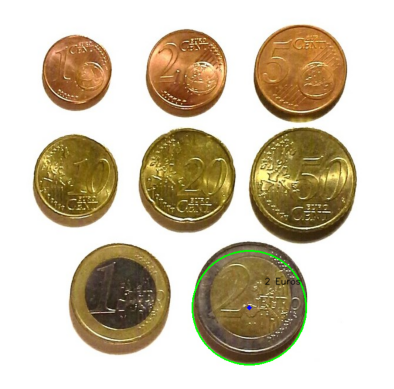

Dinero Total: 3.25€


In [41]:
def proporcion_areas(img):
    # Conversión a gris
    gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Suavizar imagen (elimina altas frecuencias)
    pimg = cv2.medianBlur(gris, 7)

    # Localizar Círculos
    circulos = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100,  # valor del gradiente
        param2=50,   # umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )
    Areas = []
    circulos = np.uint16(np.around(circulos))
    for i in range(circulos.shape[1]):
        circulo = circulos[0, i]  
        centro = (circulo[0], circulo[1])
        radio = circulo[2]
        area = math.pi * (radio ** 2)
        Areas.append(area)
        # Dibujar el círculo en la imagen original
        #cv2.circle(img, centro, radio, (0, 255, 0), 2)  # Color verde, grosor 2
    Dos_euros = np.max(Areas)
    Proporciones = []
    Valor_Final=0
    for i in range(len(Areas)):
        Proporciones.append(Areas[i]/Dos_euros)
        diferencias = np.abs(Proporciones_generales - Proporciones[i])
        indice_menor_diferencia = np.argmin(diferencias)
        Valor_Final+=Valor[indice_menor_diferencia]

        # Mostrar mensaje en el clic
    # Mostrar la imagen con el círculo dibujado
    #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #plt.axis('off')  # Ocultar ejes
    #plt.show() 
    return Dos_euros, Valor_Final

# Función para manejar el clic del mouse
def detectar_circulo(event, x, y, flags, imagen):
    if event == cv2.EVENT_LBUTTONDOWN:  # Si se hace clic con el botón izquierdo
        # Definir un tamaño de recorte alrededor del clic
        tamaño_recorte = 130
        x_min = max(x - tamaño_recorte, 0)
        x_max = min(x + tamaño_recorte, imagen.shape[1])
        y_min = max(y - tamaño_recorte, 0)
        y_max = min(y + tamaño_recorte, imagen.shape[0])
        
        # Recortar la imagen
        recorte = imagen[y_min:y_max, x_min:x_max]

        # Convertir el recorte a escala de grises
        gris = cv2.cvtColor(recorte, cv2.COLOR_BGR2GRAY)
        
        # Suavizar la imagen
        pimg = cv2.medianBlur(gris, 7)
        
        # Detectar círculos en el recorte
        circulos = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100,  # valor del gradiente
        param2=50,   # umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
        )
        
        # Si se detectan círculos
        if circulos is not None:
            circulos = np.uint16(np.around(circulos))
            prop=0
            for i in circulos[0, :]:
                centro = (i[0] + x_min, i[1] + y_min)  # Ajustar coordenadas al recorte
                radio = i[2]  # Radio del círculo
                area = math.pi * (radio ** 2)
                prop = area/dos_euros
                # Dibujar el círculo en la imagen original
                cv2.circle(imagen, centro, radio, (0, 255, 0), 2)
                cv2.circle(imagen, centro, 2, (255, 0, 0), 3)  # Punto central
        diferencias = np.abs(Proporciones_generales - prop)
        indice_menor_diferencia = np.argmin(diferencias)
        # Mostrar mensaje en el clic
        mensaje = Orden[indice_menor_diferencia]
        cv2.putText(imagen, mensaje, (x + 10, y - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        # Mostrar la imagen con el círculo detectado
        cv2.imshow('Imagen', imagen)

Orden = ['2 Euros', '50 centimos', '1 Euro', '20 centimos', '5 centimos', '10 centimos', '2 centimos', '1 centimo']
Valor = [200, 50, 100, 20, 5, 10, 2, 1]
Proporciones_generales = [1, 0.94, 0.9, 0.86, 0.82, 0.77, 0.72, 0.63]

# Cargar la imagen
imagen1 = cv2.imread('Euro_coins_line.jpg')

dos_euros, Valor_Final = proporcion_areas(imagen1)

# Mostrar la imagen en una ventana
cv2.imshow('Imagen', imagen1)

# Establecer la función de callback para el mouse, pasando la imagen como parámetro
cv2.setMouseCallback('Imagen', detectar_circulo, imagen1)

# Esperar hasta que se presione una tecla
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Ocultar ejes
plt.show() 

print(f'Dinero Total: {Valor_Final/100}€')

TAREA: Las tres imágenes cargadas en la celda inicial, han sido extraidas de las imágenes de mayor tamaño presentes en la carpeta. La tarea consiste en extraer características (geométricas y/o visuales) e identificar patrones que permitan distinguir las partículas de cada una de las tres clases, evaluando los aciertos y fallos con las imágenes completas considerando las métricas mostradas y la matriz de confusión. La matriz de confusión, muestra para cada clase el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifican incorrectamente por cada una de las otras dos clases.

En el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas fueron:

- Área en píxeles
- Perímetro en píxeles
- Compacidad (relación entre el cuadrado del perímetro y el área de la partícula)
- Relación del área de la partícula con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

Si no se quedan satisfechos con la segmentación obtenida, es el mundo real, también en el README comento técnicas recientes de segmentación, que podrían despertar su curiosidad.

Numero de pellets: 57
Numero de fragmentos: 69
Numero de alquitran: 55
Accuracy (TP/(n))= 0.8011049723756906
Precision (TP/(TP+FP)) = 0.8278493132011322
Recall (TP/(TP+FN)) = 0.8011049723756906
F1 Score (2*(precision*recall)/(precision+recall)) = 0.8013852563738817


[Text(0, 0.5, 'Pellets'),
 Text(0, 1.5, 'Fragmentos'),
 Text(0, 2.5, 'Alquitran')]

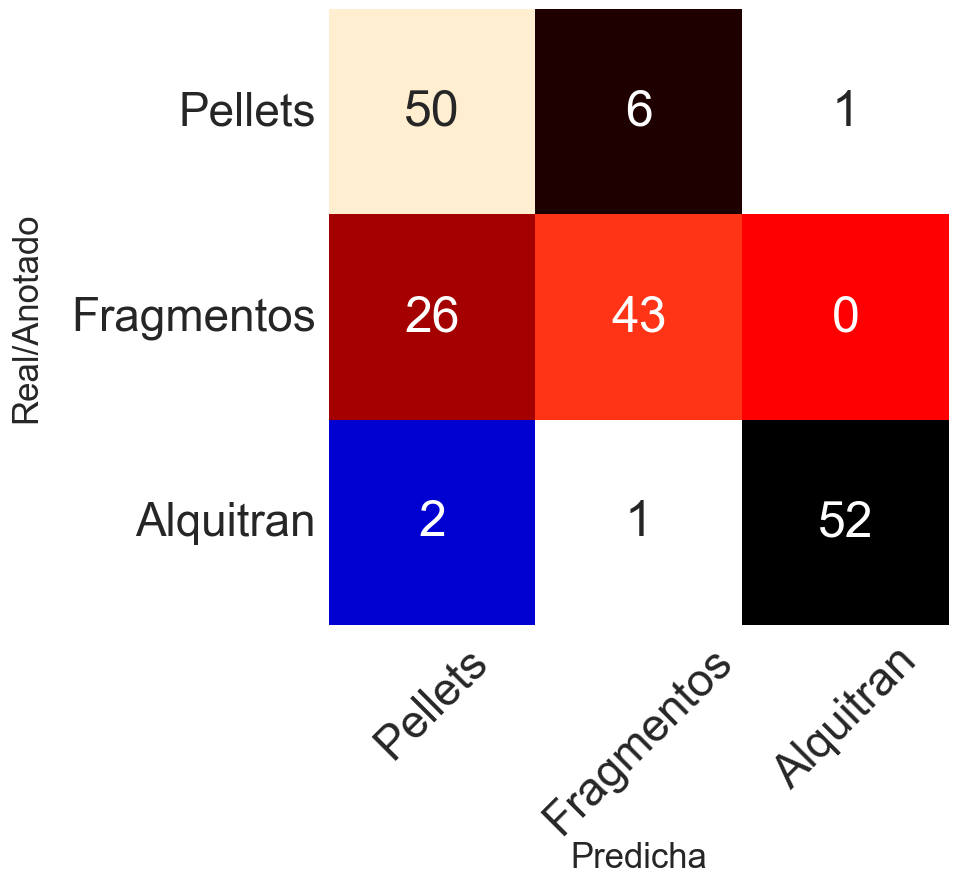

In [42]:
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

def segmentacion(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.GaussianBlur(img, (5,5), 0)

    # Convertir la imagen a escala de grises
    gris = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Aplicar umbralizado inverso
    _, umbralizado_invertido = cv2.threshold(gris, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Encontrar contornos
    contornos, hierarchy = cv2.findContours(
        umbralizado_invertido, #imagen
        cv2.RETR_EXTERNAL, #Modo de recuperación (lista, árbol, nivel superior)
        cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )
    cont=0
    contornos = [c for c in contornos if cv2.contourArea(c) > 50]
    
    return contornos, len(contornos)

def compacticidad(contornos):
    
    # Calcular áreas de los contornos
    areas = [cv2.contourArea(c) for c in contornos]
    promedio_areas = np.mean(areas) if areas else 0  # Evitar división por cero
    
    # Calcular perímetros de los contornos
    perimetros = [cv2.arcLength(c, True) for c in contornos]
    promedio_perimetros = np.mean(perimetros) if perimetros else 0  # Evitar división por cero
    
    # Calcular la compacticidad
    compacticidad_media = (promedio_perimetros ** 2) / promedio_areas if promedio_areas > 0 else 0

    return compacticidad_media

def clasificador(contornos, y_pred, c1, c2, img_color):
    for c in contornos:
        if(esNegro(c, img_color)):
            y_pred.append(3)
        else:
            area_c = cv2.contourArea(c)
            perimetro_c = cv2.arcLength(c, True)
            compacticidad_c = (perimetro_c ** 2) / area_c if area_c > 0 else 0
            dif1 = abs(compacticidad_c-c1)
            dif2 = abs(compacticidad_c-c2)
            if(dif1 >= dif2):
                y_pred.append(2)
            else:
                y_pred.append(1)
    return y_pred

def esNegro(c, img_color):
    mask = np.zeros(img_color.shape[:2], dtype=np.uint8)  # Crear una máscara en negro
    cv2.drawContours(mask, [c], -1, 255, thickness=cv2.FILLED)  # Dibujar el contorno en la máscara
    media_color = cv2.mean(img_color, mask=mask)[:3]  # Calcular el color medio (B, G, R)  
    if (((media_color[0] + media_color[1] + media_color[2]) // 3) <= colorMedio+5):
        return 1
    else: 
        return 0

def mediaColor(contornos, img_color):
    media_color = np.array([0, 0, 0], dtype=np.float32)
    for c in contornos:
        mask = np.zeros(img_color.shape[:2], dtype=np.uint8)  # Crear una máscara en negro
        cv2.drawContours(mask, [c], -1, 255, thickness=cv2.FILLED)  # Dibujar el contorno en la máscara
        media_color += cv2.mean(img_color, mask=mask)[:3]  # Calcular el color medio (B, G, R)  
    media_color = media_color / len(contornos)
    return ((media_color[0] + media_color[1] + media_color[2]) // 3)

#Cargamos las imagenes 
imagen1 = cv2.imread('PEL.png')
imagen2 = cv2.imread('FRA.png')
imagen3 = cv2.imread('TAR.png')
imagen4 = cv2.imread('pellet-03-olympus-10-01-2020_c.JPG')
imagen5 = cv2.imread('fragment-03-olympus-10-01-2020_c.JPG')
imagen6 = cv2.imread('tar-03-olympus-10-01-2020.JPG')

PEL_C, _ = segmentacion(imagen1)
FRAG_C, _ = segmentacion(imagen2)
TAR_C, _ = segmentacion(imagen3)

c1 = compacticidad(PEL_C)
c2 = compacticidad(FRAG_C)
colorMedio = mediaColor(TAR_C, imagen3)

SEG_4, PEL = segmentacion(imagen4)
SEG_5, FRAG = segmentacion(imagen5)
SEG_6, TAR = segmentacion(imagen6)

print('Numero de pellets:', PEL)
print('Numero de fragmentos:', FRAG)
print('Numero de alquitran:', TAR)

y = []
y = [1]*PEL
y += [2]*FRAG
y += [3]*TAR

y_pred = []
clasificador(SEG_4, y_pred, c1, c2, imagen4)
clasificador(SEG_5, y_pred, c1, c2, imagen5)
clasificador(SEG_6, y_pred, c1, c2, imagen6)

#Cálculo de métricas
accuracy = accuracy_score(y, y_pred)
#Para más de una clase se define la forma de promediar
precision = precision_score(y, y_pred,average='weighted')
recall = recall_score(y, y_pred,average='weighted')
f1score = f1_score(y, y_pred,average='weighted')

print(f"Accuracy (TP/(n))= {accuracy}")
print(f"Precision (TP/(TP+FP)) = {precision}")
print(f"Recall (TP/(TP+FN)) = {recall}")
print(f"F1 Score (2*(precision*recall)/(precision+recall)) = {f1score}")


conf_matrix = confusion_matrix(y, y_pred) #(real, prediccion)
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.75)#tamaños tipografía
sns.set(font_scale = 3.0)

ax = sns.heatmap(
        conf_matrix, # confusion matrix 2D array 
        annot=True, # Muestra números en las celdas
        fmt='d', # valores enteros
        cbar=False, # sin barra de colores
        cmap='flag', # mapa de colores
        #vmax=175 # contraste de color
    )

#Etiquetas matriz de confusión
label_font = {'size':'25'}
ax.set_xlabel("Predicha", labelpad=-0.75, fontdict=label_font)
ax.set_ylabel("Real/Anotado", labelpad=20, fontdict=label_font)

ax.set_xticklabels(['Pellets', 'Fragmentos', 'Alquitran'], rotation=45)  # Reemplaza con tus etiquetas
ax.set_yticklabels(['Pellets', 'Fragmentos', 'Alquitran'], rotation=0)    # Reemplaza con tus etiquetas


